# NAPAC Beam + Laser Interactions w. FACET E320 parameters
Uses xsuite and xcain to model an easy drift system with a laser interaction. Starts with simple drift and adds a head-on laser interaction.

In [1]:
import sys
import importlib
import os
from scipy.constants import c, hbar, pi
import xtrack as xt
import numpy as np
import matplotlib.pyplot as plt
import mpl_scatter_density  
from decimal import Decimal
from cpymad.madx import Madx
from scipy import stats
import pickle
from matplotlib.colors import LinearSegmentedColormap, to_rgba

In [2]:
from E320_parameters import *

In [3]:
# Add xcain module path
home_dir = '/sdf/home/m/muntingf/Desktop/xcain/'
sys.path.insert(0, os.path.abspath(home_dir))
from xcain import laser_interaction as xc
beamline_dir = '/sdf/home/m/muntingf/Desktop/FACET-II Beamline/'

In [4]:
# Define laser interaction IP
laser_interaction_elem = xc.LaserInteraction(name='e320_laser',           
                                             # change for your path                                  
                                             cain_path = home_dir+'cain_executable/cain_compiled.gcc',
                                             laser_parameter=LASER_PARAMETERS,
                                             seed=1993,
                                            #  is_on=True, # Default is True, can be turned off, to be tested
                                            photon_file='photons.hdf',
                                             part_file='particles.hdf'
                                             )

In [5]:
# Select number of particles
npart = int(n_macro)

# Generate a particle distribution for the line defined before 
# Gaussian Beam
x_dist = np.random.normal(0, sigma_e_x, npart) # m
px_dist = np.random.normal(0, sigma_xp, npart) # rad
y_dist = np.random.normal(0, sigma_e_y, npart) # m
py_dist = np.random.normal(0, sigma_yp, npart) # rad
zeta_dist = np.random.normal(0, 30e-6, npart) # m
delta_dist = np.random.normal(0, 0.01, npart) # dimensionless

## Sanity check: only drift elements.
To check everything is fine and dandy, let's start with a single drift element and see what happens to the phase space diagram. We expect a stretching.

In [6]:
# Dictionary containing the elements of the xtrack line
elements_dict = {
    'drift.1': xt.Drift(length=5)
}

# Build the line
line = xt.Line(elements=elements_dict,
               element_names=['drift.1']) # This defines the order of the elements in the line
            #    element_names=['laser_interaction']) # This defines the order of the elements in the line

# Build the tracker
line.build_tracker()


# Define reference particle related to the line 
line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)


# Select number of particles
npart = int(n_macro)

# Generate a particle distribution for the line defined before 
# Gaussian Beam
x_dist = np.random.normal(0, sigma_e_x, npart) # m
px_dist = np.random.normal(0, sigma_xp, npart) # rad
y_dist = np.random.normal(0, sigma_e_y, npart) # m
py_dist = np.random.normal(0, sigma_yp, npart) # rad

## Square beam
# x_dist = np.random.uniform(-10e-6, 10e-6, npart) # rad
# px_dist = np.random.uniform(-10e-6, 10e-6, npart) # rad
# y_dist = np.random.uniform(-10e-6, 10e-6, npart) # m
# py_dist = np.random.uniform(-10e-6, 10e-6, npart) # rad

zeta_dist = np.random.normal(0, 30e-6, npart) # m
delta_dist = np.random.normal(0, 0.01, npart) # dimensionless

no_laser_particles = line.build_particles(
            num_particles=npart,
            particle_ref=line.particle_ref,

            ## Beam parameters
            x = x_dist, px = px_dist, y = y_dist, py = py_dist, zeta = zeta_dist, delta = delta_dist)
particles=no_laser_particles

In [7]:
# # # Plot initial distribution in transverse (horizontal) phase space as an example
# fig, ax = plt.subplots()

# # ax.scatter(particles.x, particles.px)
# ax.hist2d(particles.x, particles.px, bins=50)

# ax.set_xlabel('x [m]')
# ax.set_ylabel('px [rad]')
# ax.annotate('beam energy {} GeV'.format(beam_energy_MeV/10**3),
#              xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 5), textcoords='offset pixels',
#             horizontalalignment='right',
#             color='black',
#             verticalalignment='bottom')

# plt.show()

In [8]:
# # Plot initial distribution in transverse (horizontal) phase space as an example
# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
# fig.suptitle("Tracking particles after drift", fontsize=20)
# ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
# ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

# ax1.set_xlabel('x [m]')
# ax1.set_ylabel('px [rad]')
# ax2.set_xlabel('y [m]')
# ax2.set_ylabel('py [rad]')

# # Track the particles through the line
# line.track(particles)

# ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
# ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
# ax1.legend()
# ax2.legend()
# fig.tight_layout()
# # plt.savefig("E320_parameters_drift.png")

## Adding laser interaction

In [9]:
# # Dictionary containing the elements of the xtrack line
# elements_dict = {
#     'drift.1': xt.Drift(length=5),
#     'laser_interaction': laser_interaction_elem
# }

# # Build the line
# line = xt.Line(elements=elements_dict,
#                element_names=['drift.1', 'laser_interaction']) # This defines the order of the elements in the line
#             #    element_names=['laser_interaction']) # This defines the order of the elements in the line

# # Build the tracker
# line.build_tracker()


# # Define reference particle related to the line 
# line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)


# ##
# # Select number of particles
# npart = int(n_macro)

# # Generate a particle distribution for the line defined before
# particles = line.build_particles(
#             # _capacity=2*npart,
#             num_particles=npart,
#             particle_ref=line.particle_ref,

#             ## Gaussian beam
#             x = np.random.normal(0, sigma_e_x, npart), # m
#             px = np.random.normal(0, sigma_xp, npart), # rad
#             y = np.random.normal(0, sigma_e_y, npart), # m
#             py = np.random.normal(0, sigma_yp, npart), # rad

#             ## Square beam
#             # x = np.random.uniform(-10e-6, 10e-6, npart), # m
#             # px = np.random.uniform(-10e-6, 10e-6, npart), # rad
#             # y = np.random.uniform(-10e-6, 10e-6, npart), # m
#             # py = np.random.uniform(-10e-6, 10e-6, npart), # rad
    
#             zeta = np.random.normal(0, 30e-6, npart), # m
#             delta = np.random.normal(0, 0.01, npart)) # dimensionless

In [10]:
# # Plot initial distribution in transverse (horizontal) phase space as an example
# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
# fig.suptitle("Tracking particles after drift + laser", fontsize=20)
# ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
# ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

# ax1.set_xlabel('x [m]')
# ax1.set_ylabel('px [rad]')
# ax2.set_xlabel('y [m]')
# ax2.set_ylabel('py [rad]')

# # Track the particles through the line
# line.track(particles)

# ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
# ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
# ax1.legend()
# ax2.legend()

# ax2.annotate('laser pulse energy {} J'.format(EXAMPLE_LASER_PARAMETER['pulseE']),
#              xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 5), textcoords='offset pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom')
# ax2.annotate('beam energy {} GeV'.format(beam_energy_MeV/10**3),
#              xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 20), textcoords='offset pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom')
# fig.tight_layout()

## Only laser interaction

In [11]:
# Dictionary containing the elements of the xtrack line
elements_dict = {
    # 'drift.1': xt.Drift(length=5)
    # ,
    'laser_interaction': laser_interaction_elem
}

# Build the line
line = xt.Line(elements=elements_dict,
               element_names=[
                   'laser_interaction'
                   # ,
                   #             'drift.1'
                             ]) # This defines the order of the elements in the line
            #    element_names=['laser_interaction']) # This defines the order of the elements in the line

# Build the tracker
line.build_tracker()


# Define reference particle related to the line 
line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)


##
# Select number of particles
npart = int(n_macro)

# Generate a particle distribution for the exact same distribution of particles as before (new ref. particle)
particles = line.build_particles(
            num_particles=npart,
            particle_ref=line.particle_ref,

            ## Beam Params
            x = x_dist, px = px_dist, y = y_dist, py = py_dist,

            zeta = zeta_dist, delta = delta_dist)

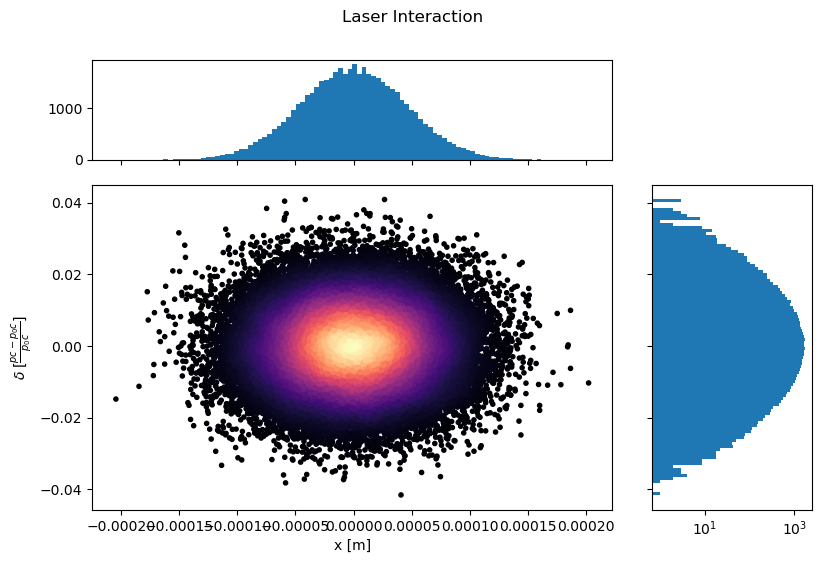

In [12]:

# Data
x = particles.x
y = particles.delta
axes_names = [r'x [m]', r'$\delta\; [\frac{pc-p_0c}{p_0c}]$']
bins = 100

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 5))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# Histograms
axHistx.hist(x, bins=bins)
axHistx.tick_params(axis="x",labelbottom=False)

axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty.tick_params(axis="y",labelleft=False)
axHisty.set_xscale('log')

# Alpha coloring for scatter plot
values = np.vstack([x,y])
kernel = stats.gaussian_kde(values)
weights = kernel(values)
weights = weights/weights.max()

# Scatter plot:
axScatter.scatter(x, y, marker='.', c=weights, cmap='magma')
axScatter.set_xlim(axHistx.get_xlim())
axScatter.set_xlabel(axes_names[0])
axScatter.set_ylabel(axes_names[1])
axScatter.set_ylim(axHisty.get_ylim())

plt.suptitle('Laser Interaction', y=1.1)
# plt.tight_layout()
plt.savefig('laser+drift_delta_vs_x.png', bbox_inches='tight', dpi = 100)

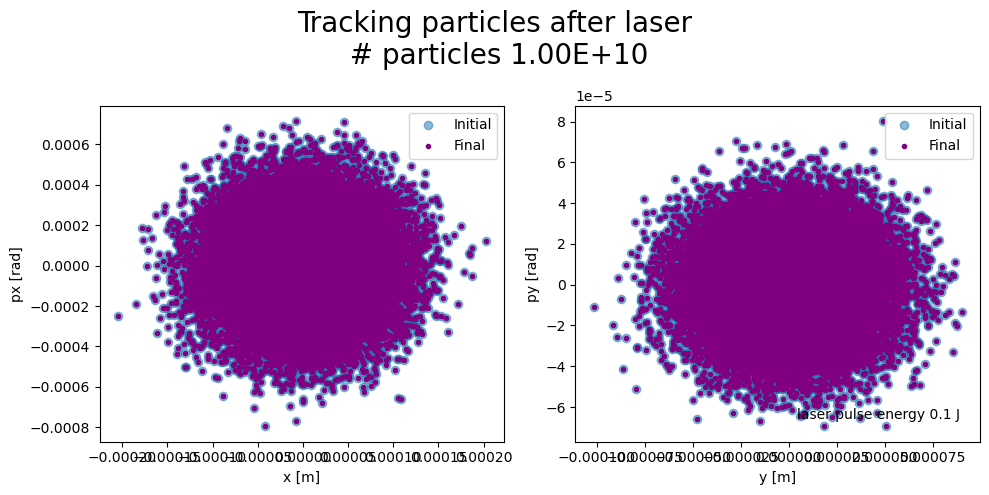

In [13]:
plz_save=np.array(y)
plz_save_x=np.array(x)
# Plot initial distribution in transverse (horizontal) phase space as an example
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle("Tracking particles after laser\n # particles %.2E"% Decimal(n_electrons), fontsize=20)
ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

ax1.set_xlabel('x [m]')
ax1.set_ylabel('px [rad]')
ax2.set_xlabel('y [m]')
ax2.set_ylabel('py [rad]')

# Track the particles through the line
line.track(particles)

ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
ax1.legend()
ax2.legend()

ax2.annotate('laser pulse energy {} J'.format(LASER_PARAMETERS['pulseE']),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
fig.tight_layout()
plt.savefig("laser_interaction")

# Laser+drift 

In [14]:
# # Dictionary containing the elements of the xtrack line
# elements_dict = {
#     'drift.1': xt.Drift(length=5)
#     # ,
#     # 'laser_interaction': laser_interaction_elem
# }
# line = xt.Line(elements=elements_dict,
#                element_names=[
#                    # 'laser_interaction'
#                    # , 
#                    'drift.1'
#                              ]) # This defines the order of the elements in the line

# # Build the tracker
# line.build_tracker()
# line.discard_tracker()
# line.insert_element('laser_interaction', element=laser_interaction_elem, at_s=0)
# line.build_tracker()

# # Define reference particle related to the line 
# line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)


# ##
# # Select number of particles
# npart = int(n_macro)

# # Generate a particle distribution for the exact same distribution of particles as before (new ref. particle)
# particles = line.build_particles(
#             num_particles=npart,
#             particle_ref=line.particle_ref,

#             ## Beam Params
#             x = x_dist, px = px_dist, y = y_dist, py = py_dist,

#             zeta = zeta_dist, delta = delta_dist)

In [15]:

# # Plot initial distribution in transverse (horizontal) phase space as an example
# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
# fig.suptitle("Tracking particles after laser + drift", fontsize=20)
# ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
# ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

# ax1.set_xlabel('x [m]')
# ax1.set_ylabel('px [rad]')
# ax2.set_xlabel('y [m]')
# ax2.set_ylabel('py [rad]')

# # Track the particles through the line

# line.track(particles)

# ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
# ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
# ax1.legend()
# ax2.legend()

# ax2.annotate('laser pulse energy {} J'.format(LASER_PARAMETERS['pulseE']),
#              xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 20), textcoords='offset pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom')
# fig.tight_layout()
# # plt.savefig("E320_parameters_laser+drift.png")

# 2D Histograms

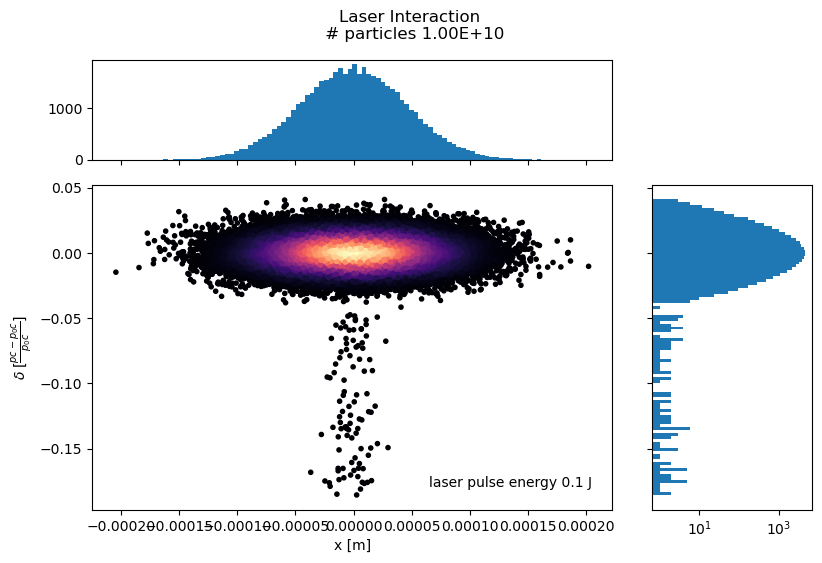

In [16]:
# Data
x = particles.x
y = particles.delta
axes_names = [r'x [m]', r'$\delta\; [\frac{pc-p_0c}{p_0c}]$']
bins = 100

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 5))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# Histograms
axHistx.hist(x, bins=bins)
axHistx.tick_params(axis="x",labelbottom=False)

axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty.tick_params(axis="y",labelleft=False)
axHisty.set_xscale('log')

# Alpha coloring for scatter plot
values = np.vstack([x,y])
kernel = stats.gaussian_kde(values)
weights = kernel(values)
weights = weights/weights.max()

# Scatter plot:
axScatter.scatter(x, y, marker='.', c=weights, cmap='magma')
axScatter.set_xlim(axHistx.get_xlim())
axScatter.set_xlabel(axes_names[0])
axScatter.set_ylabel(axes_names[1])
axScatter.set_ylim(axHisty.get_ylim())
axScatter.annotate('laser pulse energy {} J'.format(LASER_PARAMETERS['pulseE']),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

plt.suptitle('Laser Interaction \n # particles %.2E'% Decimal(n_electrons), y=1.1)
# plt.tight_layout()
plt.savefig('laser_delta_vs_x.png', bbox_inches='tight', dpi = 100)

In [17]:
# import corner
# import pandas as pd
# N = 10000
# D = 2

# def plot_with_corner(data: pd.DataFrame):
#     fig = corner.corner(
#         data,
#         smooth=0.9,
#         label_kwargs=dict(fontsize=30),
#         title_kwargs=dict(fontsize=16),
#         truth_color="tab:orange",
#         plot_density=False,
#         plot_datapoints=False,
#         max_n_ticks=3,
#         verbose=False,
#         use_math_text=True,
#     )
#     # plt.savefig("corner.png")

In [18]:
# fig = plt.figure(figsize=(10,10))
# plt.suptitle('After Laser Interaction')
# x = particles.x
# y = particles.px
# plot_dict = {'x [m]': x,
#             'px [rad]': y}
# corner.corner(data=plot_dict, bins=100, fig=fig);
# fig = plt.figure(figsize=(10,10))
# plt.suptitle('Before Laser Interaction')
# x = no_laser_particles.x
# y = no_laser_particles.px
# plot_dict = {'x [m]': x,
#             'px [rad]': y}
# corner.corner(data=plot_dict, bins=100, fig=fig);

In [19]:
num_momentum_change=len(np.where(plz_save-y>0.03)[0])
momenta_idx = np.where(plz_save-y>0.03)[0]
num_momentum_change

104

In [20]:
# Max momentum change
max(np.abs(y-plz_save))
weight=n_electrons/n_macro
num_scattered=num_momentum_change*weight
print('%.2E scattered electrons with momentum change > 3 percent' % Decimal(num_scattered))

2.08E+07 scattered electrons with momentum change > 3 percent


In [21]:
len(np.where(plz_save-y==0.0)[0])

35

# FACET Beamline Interaction

In [22]:
# Retrieving picnic basket locations (ie. laser locations)
with open('../../../FACET-II Beamline/picnicbasket_loc.pkl', 'rb') as f:
    picnic_locs = pickle.load(f)

In [23]:
# --- Load MAD-X file ---
mad = Madx()
mad.call(beamline_dir+"LI20_modifiedMadX.xsif")

# --- Expand FF20H beamline ---
mad.input("""
USE, PERIOD=FF20H;
""")

FF20H_line = xt.Line.from_madx_sequence(mad.sequence.FF20H)



  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.03  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.25               +
  + Execution date: 2025.07.25 11:31:39      +
  ++++++++++++++++++++++++++++++++++++++++++++


! *** OPTICS=FACET2-16FEB24 ***



! ==============================================================================

! FACET e- optics

! ------------------------------------------------------------------------------

! 19-JUN-2025, C. Munting

!  * Converted file from Mad8/xsif to MadX to import beamlines into Xsuite.

!  * Changes: appending ';' on each line. SBEN-->SBEND, TILT with no value --> TILT=pi/4, etc. All documented with comments.

! ------------------------------------------------------------------------------

! ------------------------------------------------------------------------------

! 17-DEC-2021, M. Woodley

!  * change WIGE "_full" definitions for Bmad translation per C. Mayes

! 04

Converting sequence "ff20h":   0%|          | 0/143 [00:00<?, ?it/s]

In [24]:
# Choose the line
line = FF20H_line
line_name = 'FF20H Line'
measurement_loc='wdsotr'
# measurement_loc=1
# With or without laser interaction
with_laser = True

# Define reference particle related to the line
if line_name in picnic_locs and with_laser:
    line.insert_element('laser', element=laser_interaction_elem, at_s=picnic_locs[line_name]) # At picnic basket location
line.cycle(name_first_element='laser', inplace=True)
line.build_tracker()
line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)
# Select number of particles
npart = int(n_macro)

# Generate a particle distribution for the exact same distribution of particles as before (new ref. particle)
particles = line.build_particles(
            num_particles=npart,
            particle_ref=line.particle_ref,
            ## Beam Params
            x = x_dist, px = px_dist, y = y_dist, py = py_dist,

            zeta = zeta_dist, delta = delta_dist)

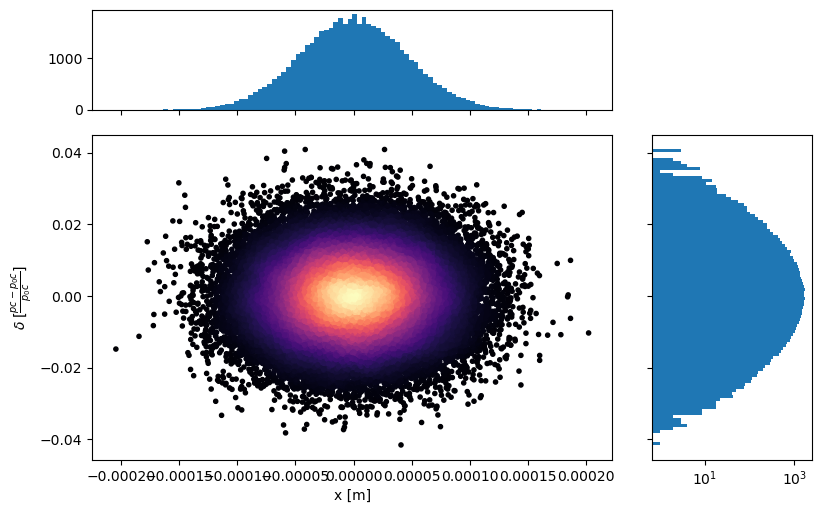

In [25]:
# Data
x = particles.x
y = particles.delta
axes_names = [r'x [m]', r'$\delta\; [\frac{pc-p_0c}{p_0c}]$']
bins = 100

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 5))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# Histograms
axHistx.hist(x, bins=bins)
axHistx.tick_params(axis="x",labelbottom=False)

axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty.tick_params(axis="y",labelleft=False)
axHisty.set_xscale('log')

# Alpha coloring for scatter plot
values = np.vstack([x,y])
kernel = stats.gaussian_kde(values)
weights = kernel(values)
weights = weights/weights.max()

# Scatter plot:
axScatter.scatter(x, y, marker='.', c=weights, cmap='magma')
axScatter.set_xlim(axHistx.get_xlim())
axScatter.set_xlabel(axes_names[0])
axScatter.set_ylabel(axes_names[1])
axScatter.set_ylim(axHisty.get_ylim())

# plt.suptitle('Laser Interaction', y=1.1)
# plt.tight_layout()
plt.savefig('laser+drift_delta_vs_x.png', bbox_inches='tight', dpi = 100)

plz_save=np.array(y)
plz_save_x=np.array(x)

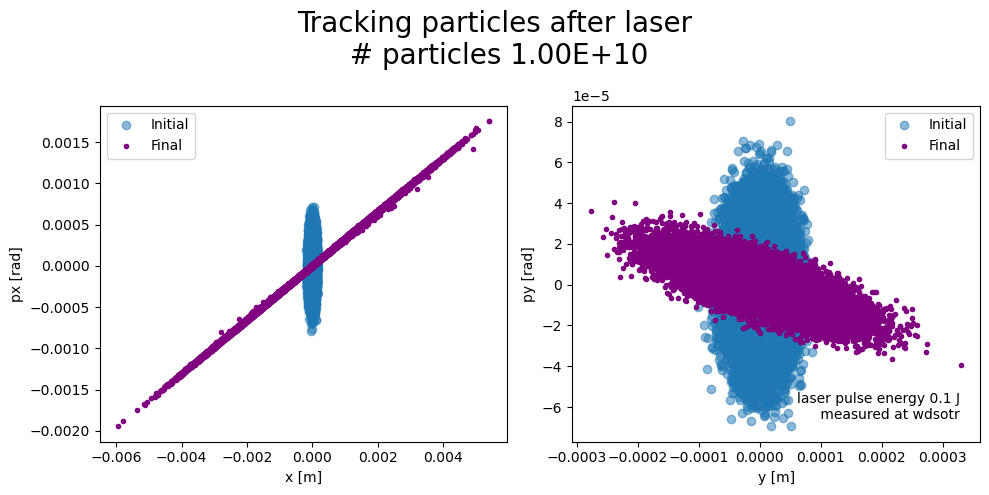

In [26]:
# Plot initial distribution in transverse (horizontal) phase space as an example
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle("Tracking particles after laser\n # particles %.2E"% Decimal(n_electrons), fontsize=20)
ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

ax1.set_xlabel('x [m]')
ax1.set_ylabel('px [rad]')
ax2.set_xlabel('y [m]')
ax2.set_ylabel('py [rad]')

# Track the particles through the line
line.track(particles, ele_stop=measurement_loc)

ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
ax1.legend()
ax2.legend()

ax2.annotate('laser pulse energy {} J\n measured at {}'.format(LASER_PARAMETERS['pulseE'], measurement_loc),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
fig.tight_layout()
plt.savefig("laser_interaction")

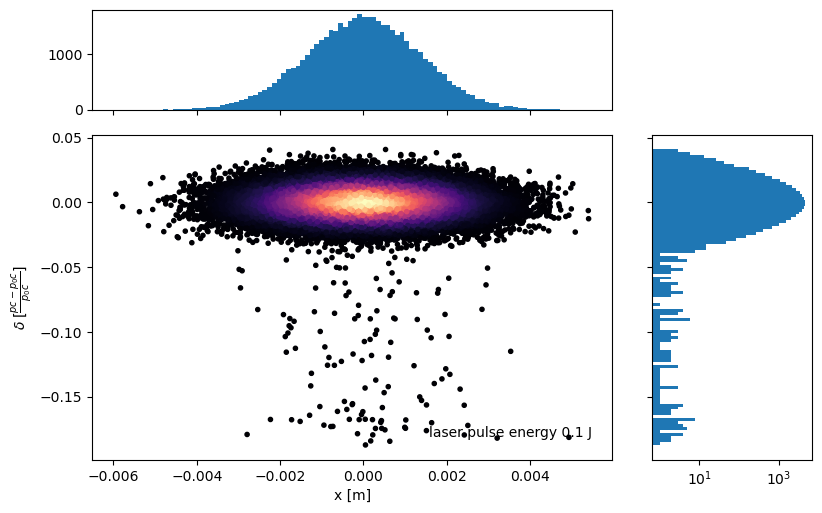

In [27]:
# Data
x = particles.x
y = particles.delta
axes_names = [r'x [m]', r'$\delta\; [\frac{pc-p_0c}{p_0c}]$']
bins = 100

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 5))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# Histograms
axHistx.hist(x, bins=bins)
axHistx.tick_params(axis="x",labelbottom=False)

axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty.tick_params(axis="y",labelleft=False)
axHisty.set_xscale('log')

# Alpha coloring for scatter plot
values = np.vstack([x,y])
kernel = stats.gaussian_kde(values)
weights = kernel(values)
weights = weights/weights.max()

# Scatter plot:
axScatter.scatter(x, y, marker='.', c=weights, cmap='magma')
axScatter.set_xlim(axHistx.get_xlim())
axScatter.set_xlabel(axes_names[0])
axScatter.set_ylabel(axes_names[1])
axScatter.set_ylim(axHisty.get_ylim())
axScatter.annotate('laser pulse energy {} J'.format(LASER_PARAMETERS['pulseE'], measurement_loc),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

# plt.suptitle('Laser Interaction \n # particles %.2E'% Decimal(n_electrons), y=1.1)
# plt.tight_layout()
plt.savefig('laser_delta_vs_x.png', bbox_inches='tight', dpi = 100)

/sdf/group/facet/muntingf/conda/envs/xsuite_env/lib/python3.11/site-packages/xplt/hooks.py:31: RuntimeWarning: Failed to register formatters with pint: No module named 'pint'
  warnings.warn(f"Failed to register formatters with pint: {e}", RuntimeWarning)
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


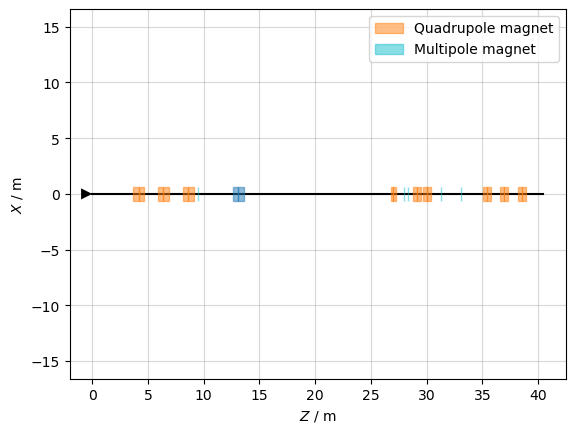

In [28]:
line.survey().plot()

In [29]:
# Max momentum change
print(max(np.abs(y-plz_save)))
weight=n_electrons/n_macro
num_momentum_change=len(np.where(plz_save-y>0.03)[0])
momenta_idx = np.where(plz_save-y>0.03)[0]
num_momentum_change
num_scattered=num_momentum_change*weight
print('%.2E scattered electrons with momentum change > 3 percent' % Decimal(num_scattered))

0.18525398525185355
2.84E+07 scattered electrons with momentum change > 3 percent


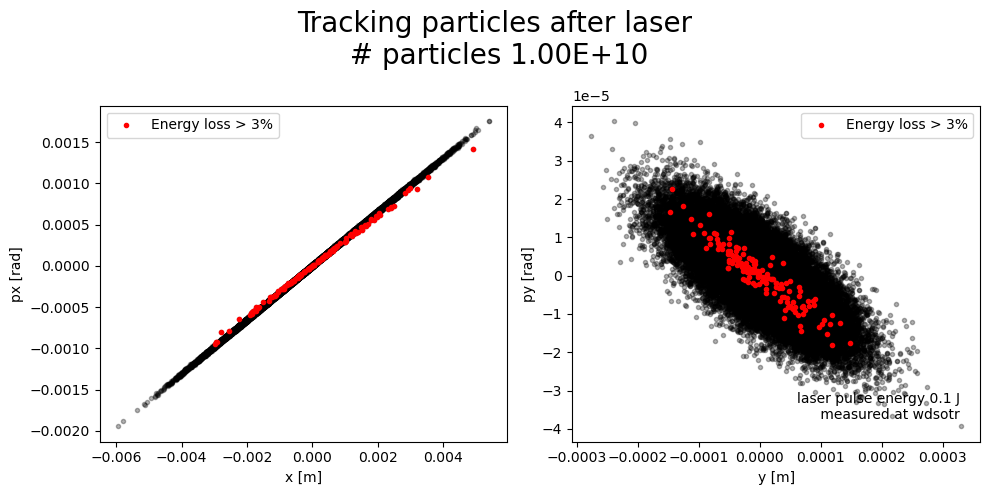

In [31]:
# Plot initial distribution in transverse (horizontal) phase space as an example
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle("Tracking particles after laser\n # particles %.2E"% Decimal(n_electrons), fontsize=20)


ax1.set_xlabel('x [m]')
ax1.set_ylabel('px [rad]')
ax2.set_xlabel('y [m]')
ax2.set_ylabel('py [rad]')
ax1.scatter(particles.x, particles.px, color='black', marker='.', alpha=0.3)
ax2.scatter(particles.y, particles.py, color='black', marker='.', alpha=0.3)


ax1.scatter(particles.x[momenta_idx], particles.px[momenta_idx], color='red', marker='.', label='Energy loss > 3%')
ax2.scatter(particles.y[momenta_idx], particles.py[momenta_idx], color='red', marker='.', label='Energy loss > 3%')
ax1.legend()
ax2.legend()
ax2.annotate('laser pulse energy {} J\n measured at {}'.format(LASER_PARAMETERS['pulseE'], measurement_loc),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
fig.tight_layout()
plt.savefig("laser_interaction")

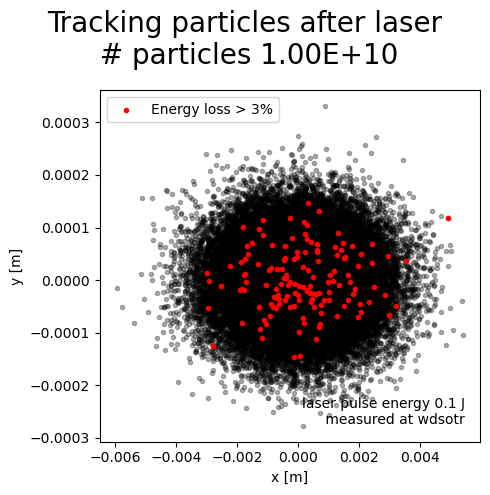

In [38]:
# Plot initial distribution in transverse (horizontal) phase space as an example
fig, ax1 = plt.subplots(1, 1,figsize=(5, 5))
fig.suptitle("Tracking particles after laser\n # particles %.2E"% Decimal(n_electrons), fontsize=20)


ax1.set_xlabel('x [m]')
ax1.set_ylabel('y [m]')
ax1.scatter(particles.x, particles.y, color='black', marker='.', alpha=0.3)

ax1.scatter(particles.x[momenta_idx], particles.y[momenta_idx], color='red', marker='.', label='Energy loss > 3%')
ax1.legend()
ax1.annotate('laser pulse energy {} J\n measured at {}'.format(LASER_PARAMETERS['pulseE'], measurement_loc),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-15, 15), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
fig.tight_layout()
plt.savefig("pos_vs_energyloss.png")